# Importation

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2021-08-25 11:16:30.231423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-25 11:16:30.231584: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# load the dataset and preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load digits
digits = load_digits()

#create the variables
images = digits['images']
images= images.reshape(-1, 64)
targets = digits['target']

#print shape 
print(images.shape)
print(targets.shape)

#standardscaler
scaler =StandardScaler()
scaler.fit_transform(images)

#train test split
img_train , img_test, targets_train, targets_test = train_test_split(images, targets, test_size=.2)
print(img_train.shape, img_test.shape)
print(targets.shape, targets_test.shape)

(1797, 64)
(1797,)
(1437, 64) (360, 64)
(1797,) (360,)


# Modeling

In [17]:
#flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[8,8]))

#create the layers
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
prediction = model(img_train[0:1])
print(prediction , targets_train[0:1])

tf.Tensor(
[[0.01260349 0.00099939 0.10121271 0.03936714 0.00527565 0.03687683
  0.04340547 0.04036947 0.03401162 0.6858782 ]], shape=(1, 10), dtype=float32) [9]


# the summary of model

In [19]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 50,826
Trainable params: 50,826
Non-trainable params: 0
_________________________________________________________________
None


# compile the model

In [20]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

# fit the model

In [36]:
history = model.fit(img_train, targets_train, epochs=50, validation_split=.2)

Epoch 1/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9757
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9757
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9757
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9757
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9757
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9757
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0980 - val_accuracy: 0.9757
Epoch 8/50
36/36 [==

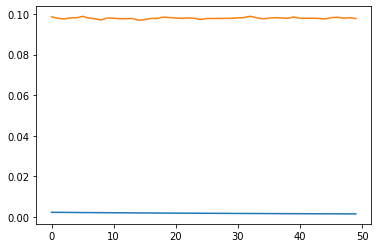

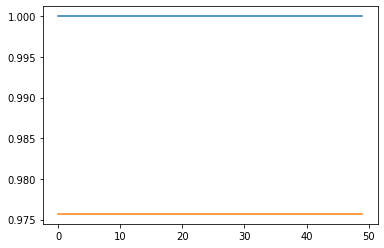

In [39]:
#loss
loss = history.history['loss']
loss_val = history.history['val_loss']

#accuracy
accuracy = history.history['accuracy']
acc_val = history.history['val_accuracy']

#visulalization
plt.figure()
plt.plot(loss)
plt.plot(loss_val)
plt.show()

plt.figure()
plt.plot(accuracy)
plt.plot(acc_val)
plt.show()

In [40]:
output = model(img_test[0:1])
print(output, targets_test[0:1])

tf.Tensor(
[[1.16968852e-06 2.14298800e-01 2.55944360e-06 6.04777952e-08
  4.14833557e-05 1.04985716e-07 7.69340932e-01 2.34128272e-09
  1.63148344e-02 3.77101408e-08]], shape=(1, 10), dtype=float32) [6]
